![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

C:\Users\you75\AppData\Local\Temp\ipykernel_4972\1232872497.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset["group"] = "men"
C:\Users\you75\AppData\Local\Temp\ipykernel_4972\1232872497.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset["group"] = "women"
C:\Users\you75\AppData\Local\Temp\ipykernel_4972\1232872497.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

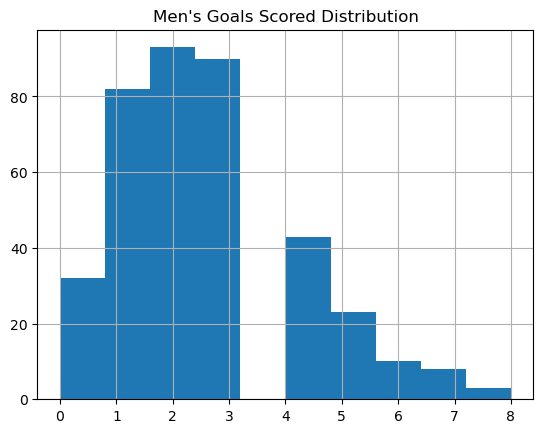

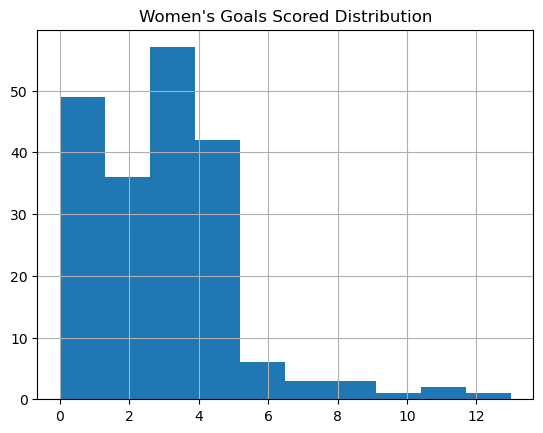

{'p_val': 0.0014274905852169545, 'result': 'reject'}


<Figure size 640x480 with 0 Axes>

In [24]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load men's and women's datasets
men = pd.read_csv("men_results.csv")
women = pd.read_csv("women_results.csv")

# Filter the data for the time range and tournament
men["date"] = pd.to_datetime(men["date"])
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"] == "FIFA World Cup")]
women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"] == "FIFA World Cup")]

# Create group and goals_scored columns
men_subset["group"] = "men"
women_subset["group"] = "women"
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

# Plot histograms to determine normality
men_subset["goals_scored"].hist()
plt.title("Men's Goals Scored Distribution")
plt.show()
plt.clf()

women_subset["goals_scored"].hist()
plt.title("Women's Goals Scored Distribution")
plt.show()
plt.clf()

# Combine women's and men's data
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)

# Calculate means and standard deviations
x_bar_women = both[both['group'] == "women"]["goals_scored"].mean()
x_bar_men = both[both['group'] == "men"]["goals_scored"].mean()
std_women = both[both['group'] == "women"]["goals_scored"].std()
std_men = both[both['group'] == "men"]["goals_scored"].std()

n_women = len(both[both['group'] == "women"])
n_men = len(both[both['group'] == "men"])

# Perform the t-test (one-tailed)
t_stat, p_val = stats.ttest_ind(both[both['group'] == "women"]["goals_scored"], 
                                both[both['group'] == "men"]["goals_scored"], 
                                alternative='greater')

# Determine the result
alpha = 0.10
result = 'reject' if p_val < alpha else 'fail to reject'

# Store the p-value and result in the dictionary
result_dict = {"p_val": p_val, "result": result}
print(result_dict)
